In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("C:/Users/Rajen/Downloads/population_by_country_2020.csv")
df_clean = df.copy()

In [4]:
# Clean percentage columns
percent_columns = ['Yearly Change', 'Urban Pop %', 'World Share']
for col in percent_columns:
    df_clean[col] = df_clean[col].str.replace('%', '').str.replace('N.A.', '').str.strip()
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [5]:
# Convert string numeric columns
df_clean['Fert. Rate'] = pd.to_numeric(df_clean['Fert. Rate'], errors='coerce')
df_clean['Med. Age'] = pd.to_numeric(df_clean['Med. Age'], errors='coerce')

sns.set(style="whitegrid")

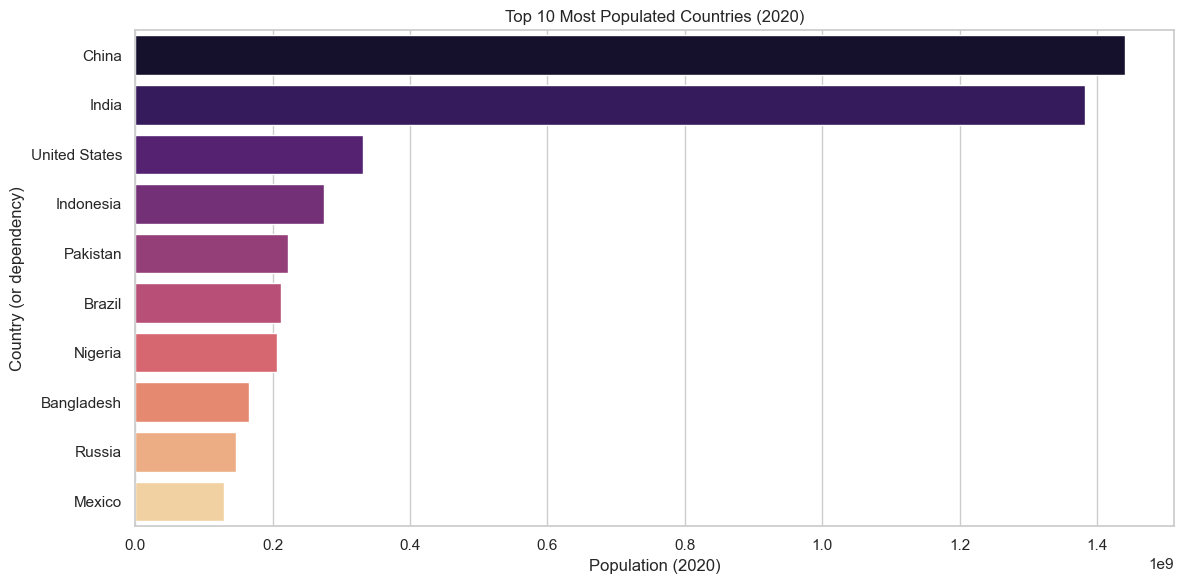

In [18]:
# Top 10 countries by population
top10_pop = df_clean.sort_values(by='Population (2020)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y='Country (or dependency)', x='Population (2020)', data=top10_pop, hue='Country (or dependency)', palette='magma')
plt.title('Top 10 Most Populated Countries (2020)')
plt.tight_layout()
plt.show()

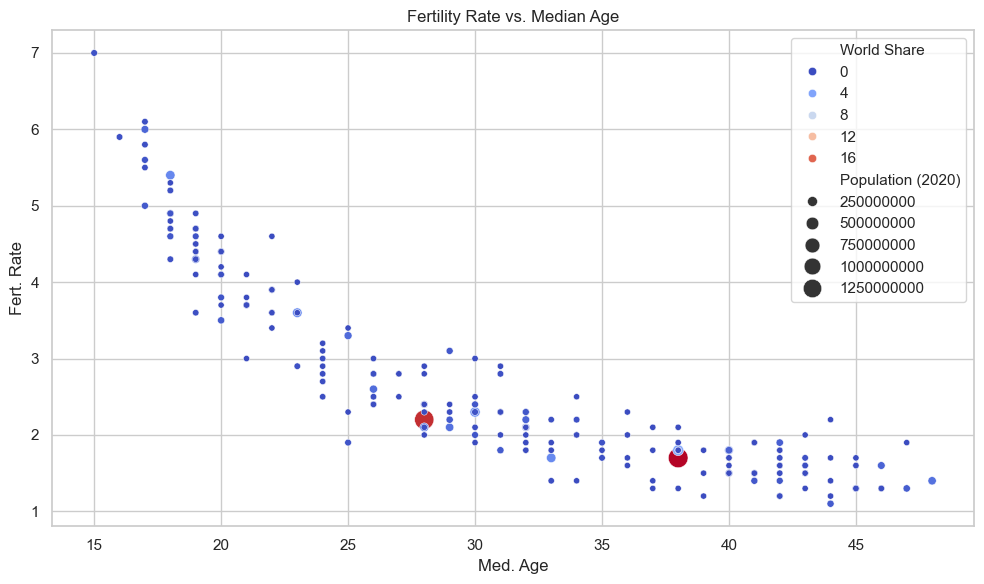

In [7]:
# Fertility vs. Median Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Med. Age', y='Fert. Rate',hue='World Share', palette='coolwarm',size='Population (2020)', sizes=(20, 200))
plt.title('Fertility Rate vs. Median Age')
plt.tight_layout()
plt.show()

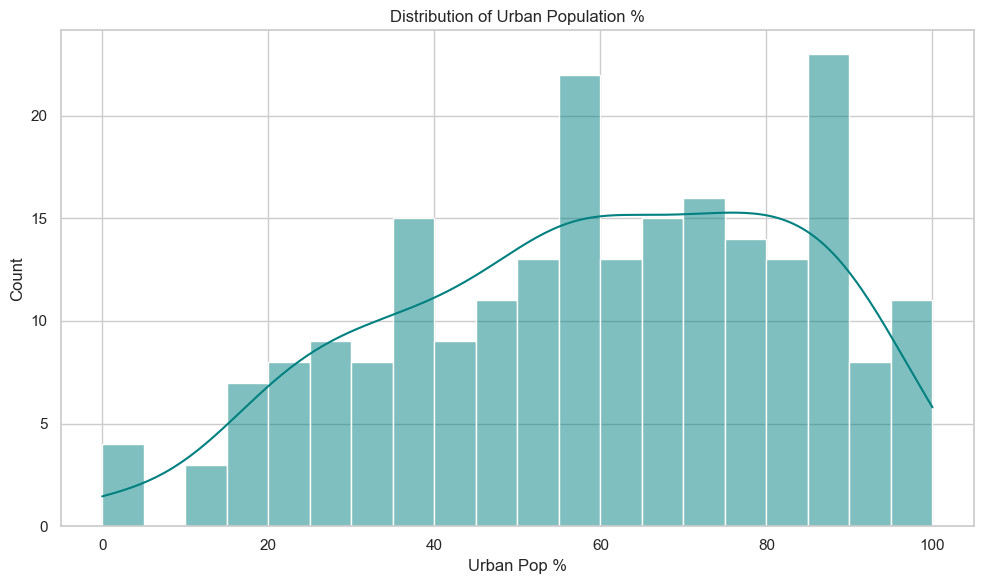

In [8]:
# Urban Population % distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Urban Pop %'].dropna(), bins=20, kde=True, color='teal')
plt.title('Distribution of Urban Population %')
plt.tight_layout()
plt.show()

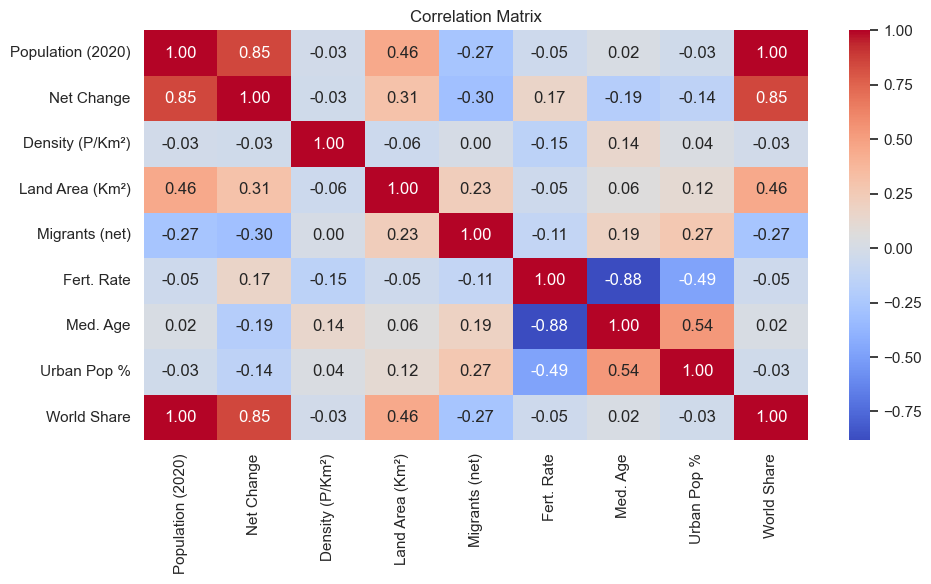

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df_clean[['Population (2020)', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)',
                 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


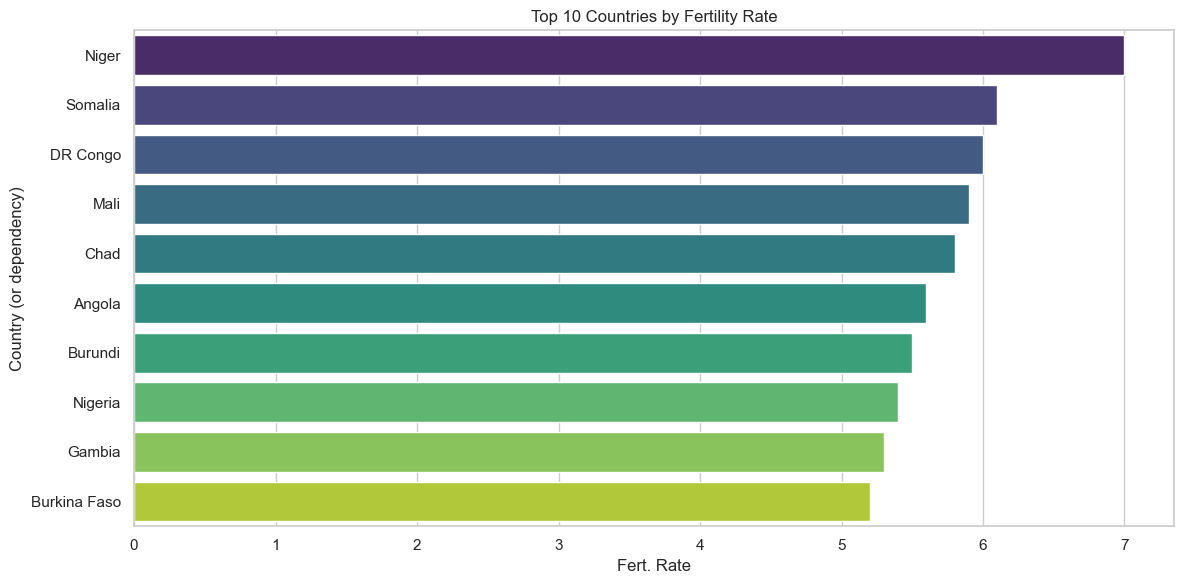

In [10]:
# Top 10 countries with highest Fertility Rate
top10_fertility = df_clean.sort_values(by='Fert. Rate', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Fert. Rate', y='Country (or dependency)', data=top10_fertility, hue='Country (or dependency)', palette='viridis', legend=False)
plt.title('Top 10 Countries by Fertility Rate')
plt.tight_layout()
plt.show()


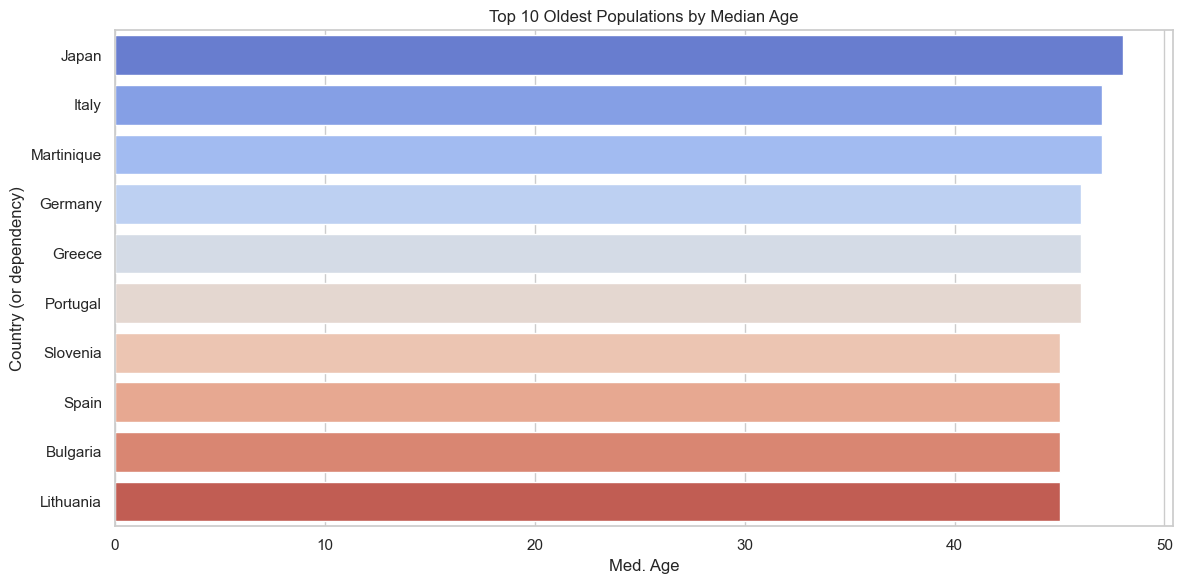

In [11]:
# Top 10 countries with highest Median Age —
top10_age = df_clean.sort_values(by='Med. Age', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Med. Age', y='Country (or dependency)', data=top10_age,
            hue='Country (or dependency)', palette='coolwarm', legend=False)
plt.title('Top 10 Oldest Populations by Median Age')
plt.tight_layout()
plt.show()


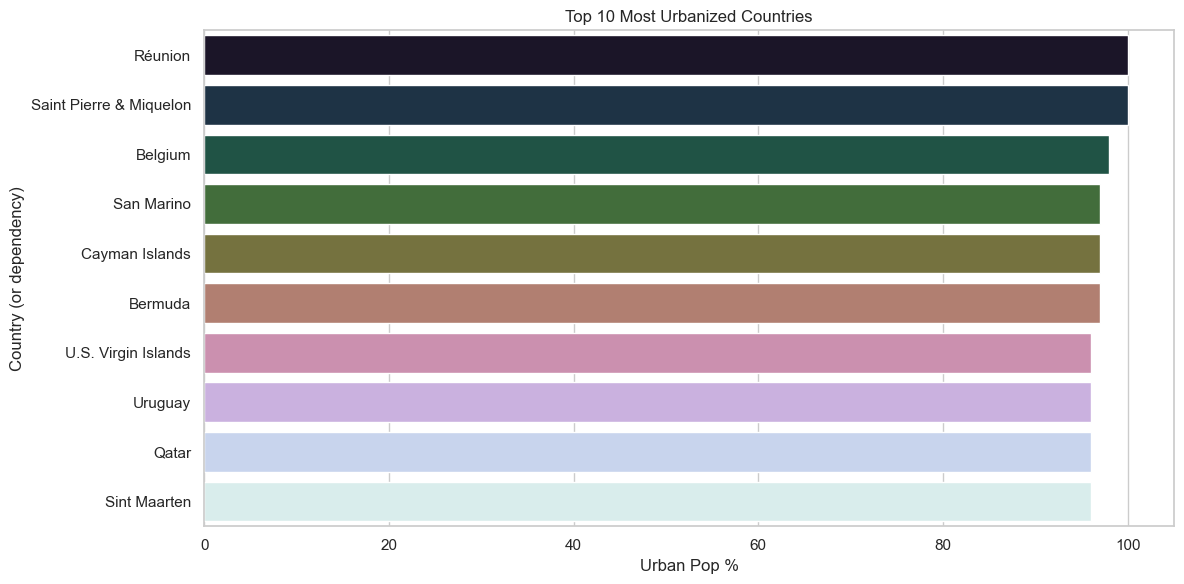

In [12]:
# Top 10 Urbanized Countries 
top10_urban = df_clean.sort_values(by='Urban Pop %', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Urban Pop %', y='Country (or dependency)', data=top10_urban,
            hue='Country (or dependency)', palette='cubehelix', legend=False)
plt.title('Top 10 Most Urbanized Countries')
plt.tight_layout()
plt.show()


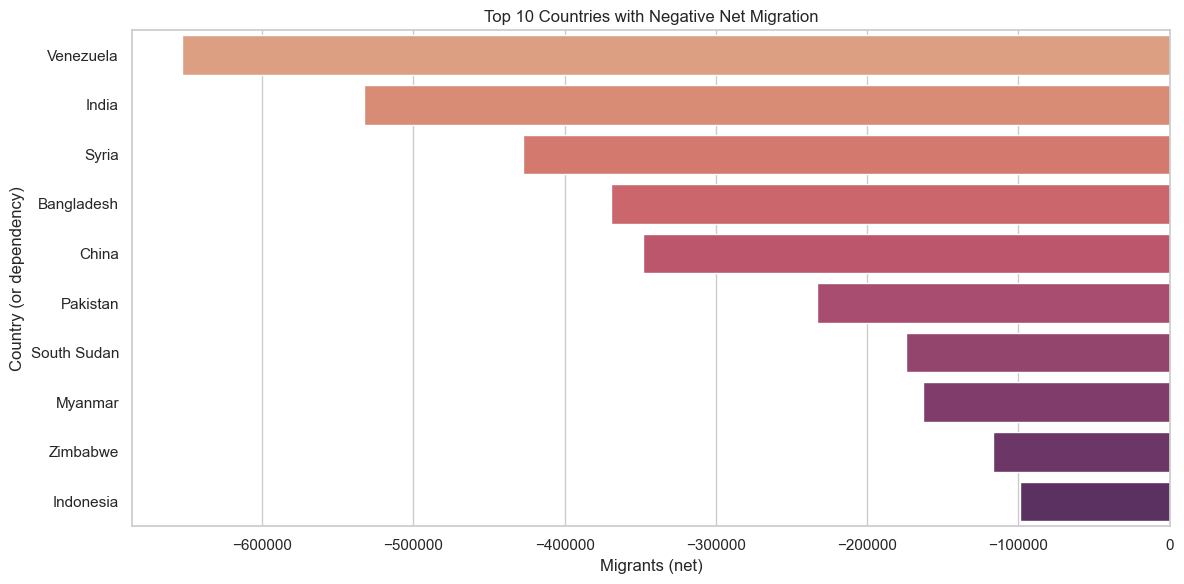

In [13]:
# Countries with most negative migration
neg_migration = df_clean[df_clean['Migrants (net)'] < 0].sort_values(by='Migrants (net)').head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Migrants (net)', y='Country (or dependency)', data=neg_migration,
            hue='Country (or dependency)', palette='flare', legend=False)
plt.title('Top 10 Countries with Negative Net Migration')
plt.tight_layout()
plt.show()


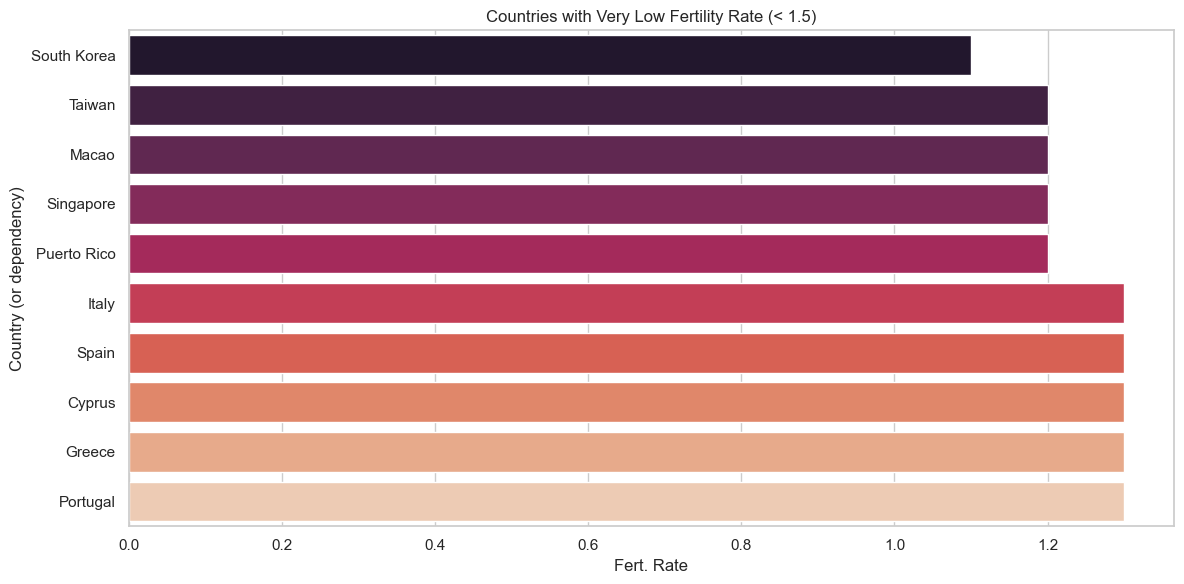

In [14]:
# Countries with Fertility Rate < 1.5
# Countries with Very Low Fertility Rate (< 1.5) — Warning Fixed
low_fertility = df_clean[df_clean['Fert. Rate'] < 1.5].sort_values(by='Fert. Rate').head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Fert. Rate', y='Country (or dependency)', data=low_fertility,
            hue='Country (or dependency)', palette='rocket', legend=False)
plt.title('Countries with Very Low Fertility Rate (< 1.5)')
plt.tight_layout()
plt.show()


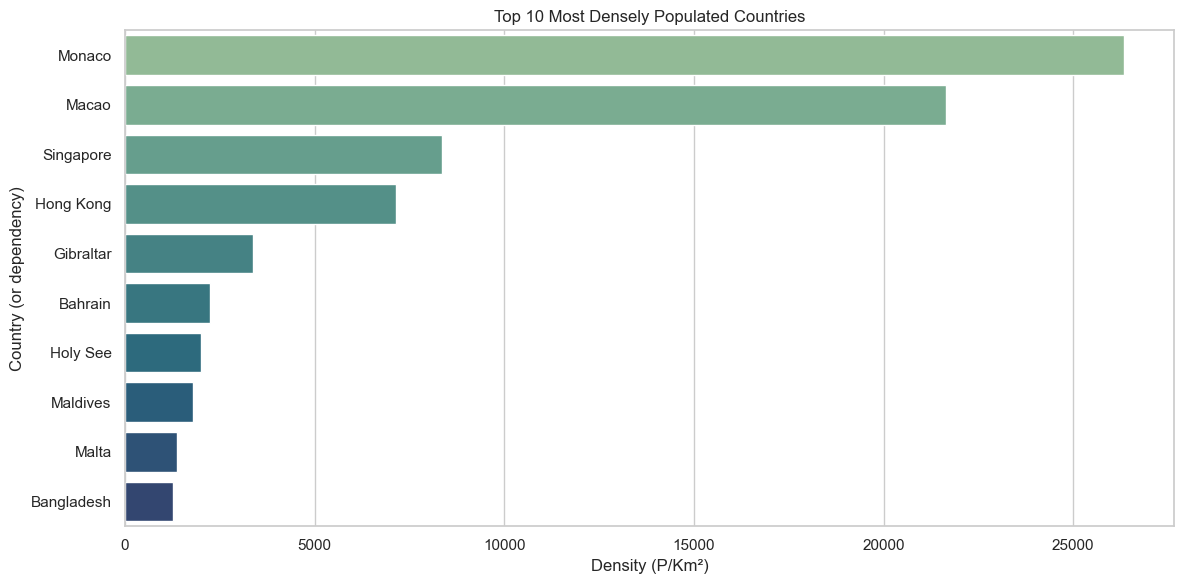

In [15]:
# Most densely populated countries
top10_density = df_clean.sort_values(by='Density (P/Km²)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Density (P/Km²)', y='Country (or dependency)', data=top10_density,
            hue='Country (or dependency)', palette='crest', legend=False)
plt.title('Top 10 Most Densely Populated Countries')
plt.tight_layout()
plt.show()